In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\surya\NareshIT\ EDA_python\Visadataset - Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Box plot**
- Box plot is used for detect outlier
- box plot has min q1 q2 q3 q4 and max value
- Inside box plot red line represents median which is 50 percentile data
**Outlier**
- very very huge observation
- very very small observation
- which pull the data in any side of the distribution
- for mild outliers
  - q1-1.5 * IQR and q3+1.5*IQR
- strong outlier
 - q1-3 * IQR and q3+3*IQR
- IQR : Inter quartile Range
  - IQR=Q3-Q1
- q1: 25p
- q2: 50p
- q3: 75p

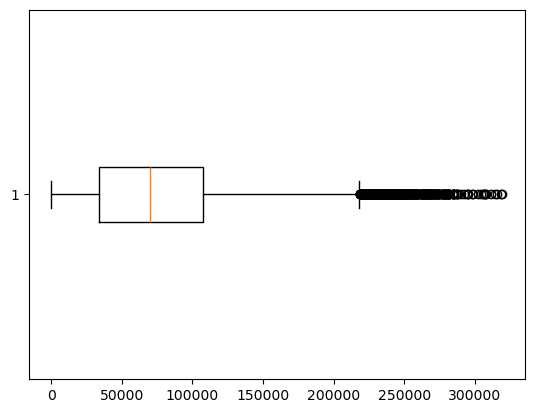

In [3]:
plt.boxplot(visa_df['prevailing_wage'],vert=False)
plt.show()

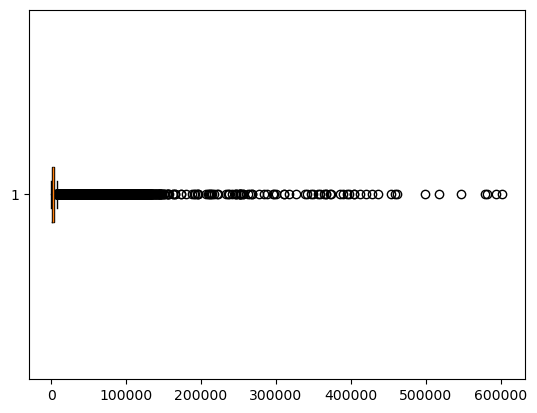

In [4]:
plt.boxplot(visa_df['no_of_employees'],vert=False)
plt.show()

<Axes: >

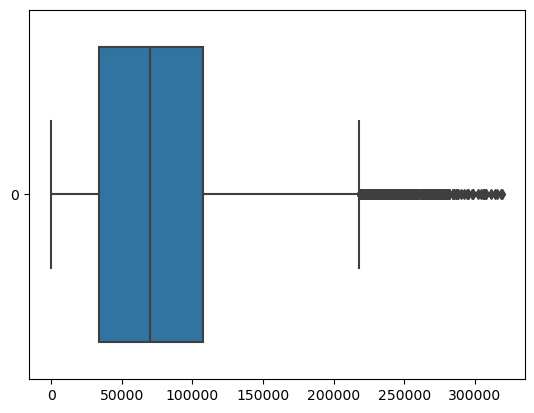

In [5]:
sns.boxplot(visa_df['prevailing_wage'],orient='h')


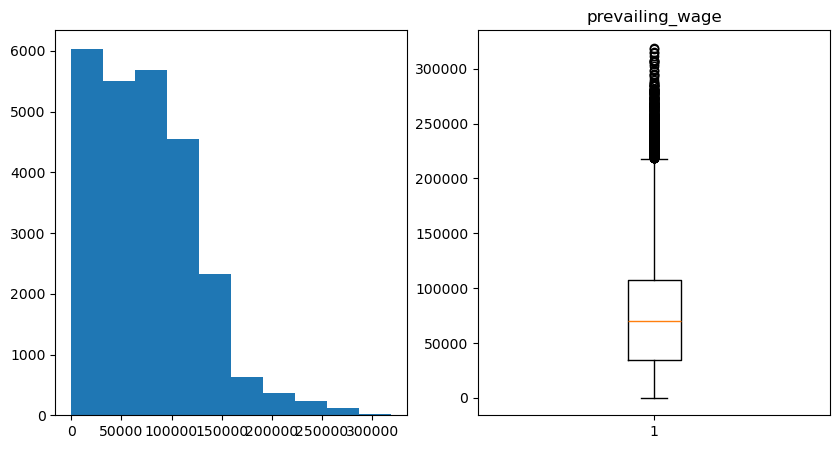

In [7]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.title('prevailing_wage')
plt.show()

**Finding the outlier**
- outliers are available less than q1-1.5 * IQR
- outliers are available greater than q3+1.5 * IQR
- step1:
   - calculate Q1
   - calculate Q3
   - calculate IQR:Q3-Q1
- step2:
   - LB= Q1-1.5 * IQR
   - UB= Q3+1.5 * IQR
- step3:
   - con1=visa_df['prevailing_wage']<LB
   - con2=visa_df['prevailing_wage']>UB
   - apply or operator and get the outliers data

**Outlier Data**

In [39]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
#Q1,Q3
IQR=Q3-Q1
#step2:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
#step3:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outlier_data=visa_df[con1 | con2]
len(outlier_data)


427

**Non outleir Data**

In [34]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
#Q1,Q3
IQR=Q3-Q1
#step2:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
#step3:
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**Histogram and boxplot for non outlier**

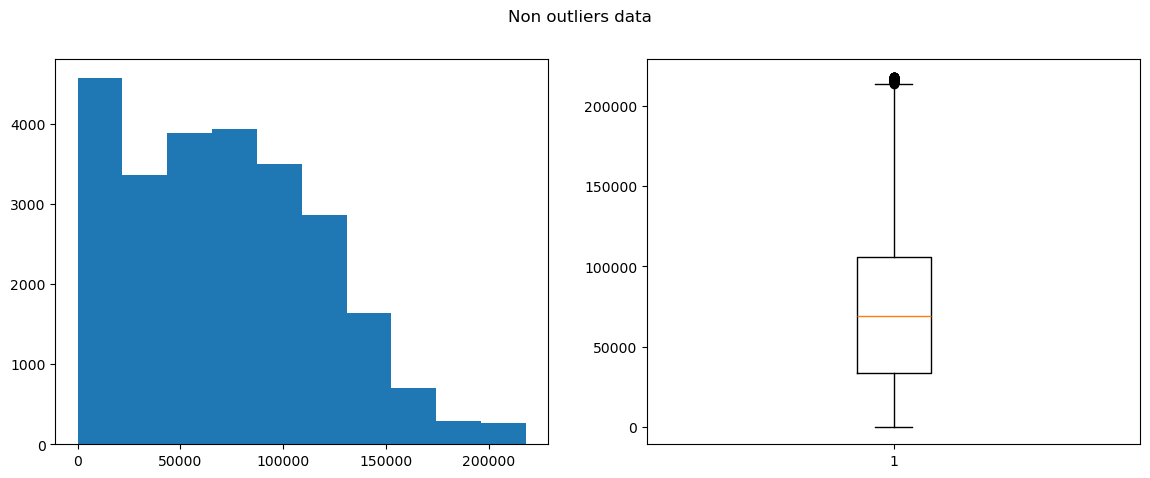

In [35]:
plt.figure(figsize=(14,5))
plt.suptitle('Non outliers data')
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage']) #25053
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

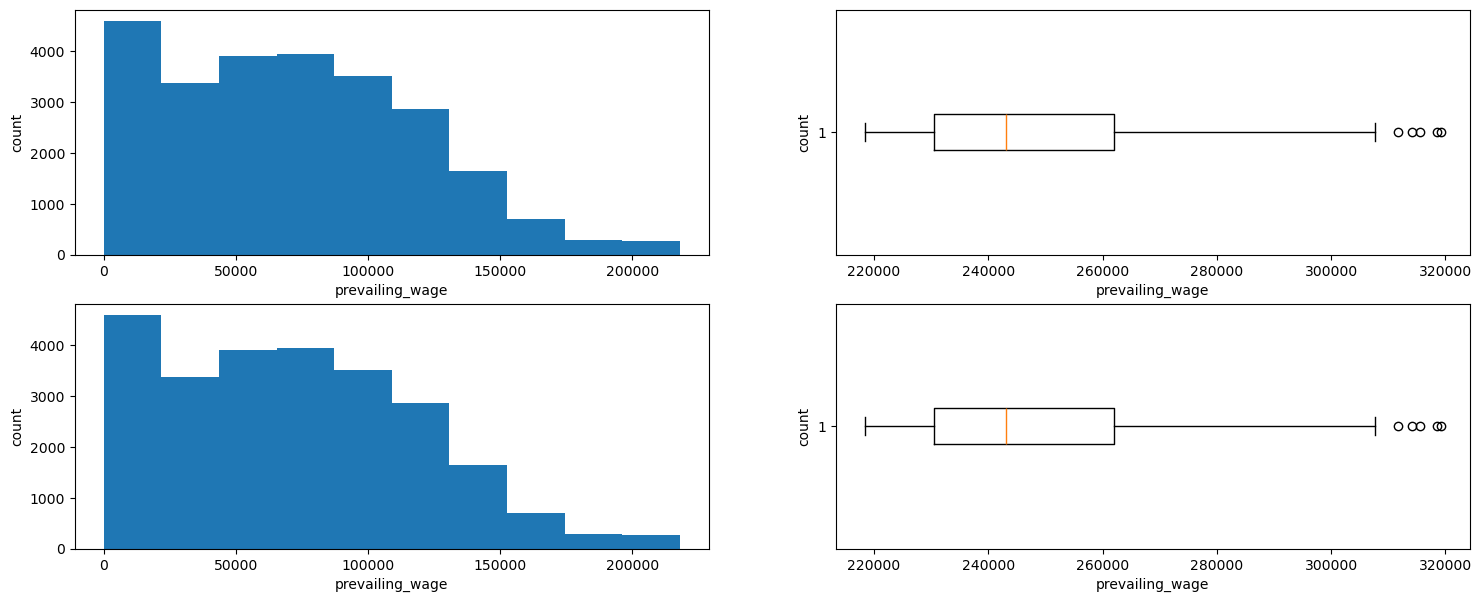

In [43]:
plt.figure(figsize=(18,7))
plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(2,2,2).boxplot(outlier_data['prevailing_wage'],vert=False)
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'])
plt.xlabel('prevailing_wage')
plt.ylabel('count')
plt.subplot(2,2,4).boxplot(outlier_data['prevailing_wage'],vert=False)
plt.xlabel('prevailing_wage')
plt.ylabel('count')

plt.show()



**How to deal the outliers**
- method-1: Drop the outliers
  - Drop the outliers is not a good idea
  - when you deop the outliers, data will loss
  - for example here we are deoping 427 rows
  - x% of 25480=427
  - It is 1.7% data, here it is fine we can drop the outlier
    
    
- Method-2: Fill with median value
   - we already know that outliers does not affect the median
   - so we can fill outliers by median
     
     
- Method-3:Cap the values with Q1 and Q3
   - all less than lower bound values, we can replace with q1 or LB
   - all greater than upper bound values, we can replace with q3 or UB

**Fill with median**
- create a empty list
- calculate median value : visa_df['prevailing_wage'].median
- iterate the visa_df['prevailing_wage'].values
- if each value < LB  or > UB then append with median values
- else append with i value

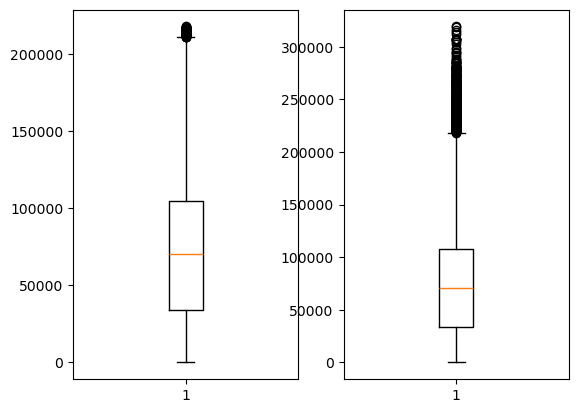

In [51]:
l1=[]

median=visa_df['prevailing_wage'].median()
Q1=np.percentile(visa_df['prevailing_wage'],25)
Q3=np.percentile(visa_df['prevailing_wage'],75)
IQR=Q3-Q1

for values in visa_df['prevailing_wage'].values:
    if values<LB or values>UB:
        l1.append(median)
    else:
        l1.append(values)
visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**
- np.where will use for binary condition
- It has 3 argumnets
   - condition
   - value if condition is True
   - value if condition is False

In [54]:
d={'sub':['DS','ML','CS'],
    'marks':[100,150,67]}
data=pd.DataFrame(d)
data
#marks column replacee with 1 when value>100
# else same value
#marks marks
#100   100
#150    1
#76     67

,sub,marks
0,DS,100
1,ML,150
2,CS,67


In [56]:
con=data['marks']>100
l=np.where(con,1,data['marks'])
l
#if condition True then replace with:1
#if condition False the replace with : data['marks']

array([100,   1,  67], dtype=int64)

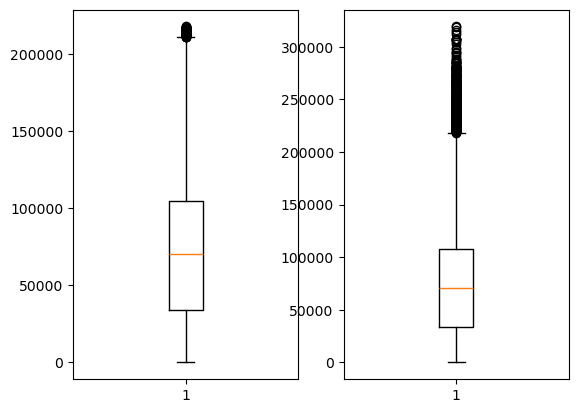

In [62]:
con1=visa_df["prevailing_wage"]<LB 
con2=visa_df['prevailing_wage']>UB
con =con1 | con2
median=visa_df['prevailing_wage'].median()
new_data=np.where(con,median,visa_df['prevailing_wage'])
visa_df_copy=visa_df.copy()
visa_df_copy['prevailing_wage']=new_data
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()